### Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.
Crea almenys una visualització per:  
Una variable categòrica (Districte o Barri)  
Una variable numèrica (Preu)  
Una variable numèrica i una categòrica (Districte i Preu)  
Dues variables numèriques (Any o Trimestre i Preu)  
Tres variables (Barri o Districte, Trimestre i Preu)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

#### Carga del dataset

In [2]:
df_preuLloguer = pd.read_csv("C:/IT Academy/Sprint 4 Visualització gràfica de dades/preu lloguer per trimestre i barri.csv")

In [3]:
df_preuLloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [4]:
df_preuLloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [5]:
df_preuLloguer['Preu']=pd.to_numeric(df_preuLloguer['Preu'], errors='coerce') # cambiamos el tipo de la variable 'Preu'
df_preuLloguer.dtypes

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object

#### Lipieza del dataset

In [6]:
df_preuLloguer.duplicated().sum() # vemos si tenemos registros duplicados

0

In [7]:
df_preuLloguer.isnull().sum() # vemos si tenemos datos nulos

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

In [8]:
df_preuLloguer.isna().sum() # vemos si tenemos Nans

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

#### Análisis del dataset

##### Lloguer mitjà mensual (Euros/mes)

In [9]:
df_preuLloguer['Lloguer_mitja'].unique()  # obtenemos las dos variables que nos dividen el dataset

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [10]:
preuLloguerMM = df_preuLloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'  # filtramos el dataset original
df_preuLloguerMM = df_preuLloguer[preuLloguerMM]   # dataframe con los precios medios mesuales
df_preuLloguerMM.shape

(292, 8)

In [11]:
mean_preuMM = df_preuLloguerMM['Preu'].mean()  # sustituimos los valores Nan de la columna 'Preu'
df_preuLloguerMM['Preu'].fillna(value=mean_preuMM, inplace = True)
df_preuLloguerMM.isna().sum() # vemos si tenemos Nans

C:\Users\María\AppData\Local\Temp\ipykernel_21576\2530007888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preuLloguerMM['Preu'].fillna(value=mean_preuMM, inplace = True)


Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [12]:
df_preuLloguerMM.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.00,292.00,292.00,292.00
mean,2021.0,2.50,6.25,37.00,871.59
std,0.0,1.12,2.79,21.11,212.67
min,2021.0,1.00,1.00,1.00,447.50
25%,2021.0,1.75,4.00,19.00,750.80
50%,2021.0,2.50,7.00,37.00,826.10
75%,2021.0,3.25,8.00,55.00,927.75
max,2021.0,4.00,10.00,73.00,1816.50


#### Análisis estadístico
Observamos que el valor del precio mínimo y máximo distan de la media, más el máximo que el mínimo, lo que nos da una distribución sesgada a la izquierda o positiva. Los valores del 25% y el 75% sí están cercanos al valor del 50%, por lo que podemos deducir que tenemos outliers.

##### Lloguer mitjà per superfície (Euros/m2 mes)

In [13]:
preuLloguerMS = df_preuLloguer['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)' # filtramos el dataset original
df_preuLloguerMS = df_preuLloguer[preuLloguerMS] # dataframe con los precios medios por metro cuadrado
df_preuLloguerMS.shape

(292, 8)

In [14]:
mean_preuMS = df_preuLloguerMS['Preu'].mean()  # sustituimos los valores Nan de la columna 'Preu'
df_preuLloguerMS['Preu'].fillna(value=mean_preuMS, inplace = True)
df_preuLloguerMS.isna().sum() # vemos si tenemos Nans

C:\Users\María\AppData\Local\Temp\ipykernel_21576\4264850677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preuLloguerMS['Preu'].fillna(value=mean_preuMS, inplace = True)


Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [15]:
df_preuLloguerMS.describe().round(2)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,292.0,292.00,292.00,292.00,292.00
mean,2021.0,2.50,6.25,37.00,12.72
std,0.0,1.12,2.79,21.11,1.64
min,2021.0,1.00,1.00,1.00,6.70
25%,2021.0,1.75,4.00,19.00,11.70
50%,2021.0,2.50,7.00,37.00,12.72
75%,2021.0,3.25,8.00,55.00,13.52
max,2021.0,4.00,10.00,73.00,18.00


#### Análisis estadístico.
La distribución del precio del alquiler por metro cuadrado está más centrada en su media, la desviación estandar es pequeña y los valores recogidos en los cuartiles son proporcionados. 

**Visualización para una variable categórica (Districte o Barri)**

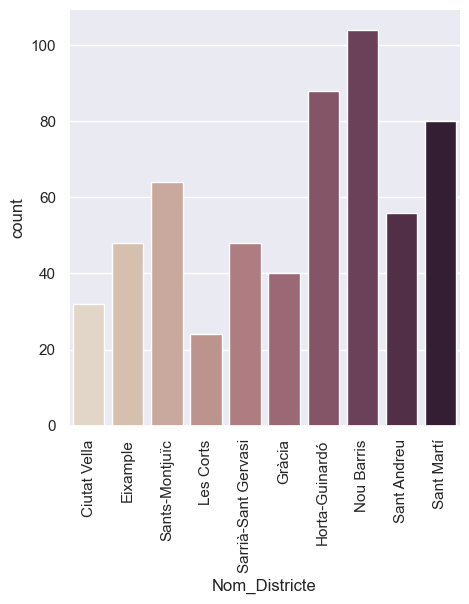

In [16]:
sns.catplot(data=df_preuLloguer, x="Nom_Districte", kind="count", palette="ch:.25") # aquí debemos utilizar el dataset original
plt.xticks(rotation=90)
plt.savefig("Graf_Districte.png");

Observamos que hay más viviendas alquiladas por año en los distritos de Nou Barris, Horta-Guinardó y Sant Martí, y menos en Les Corts, Ciutat Vella y Gràcia.

**Visualización para una variable numérica (Preu)**

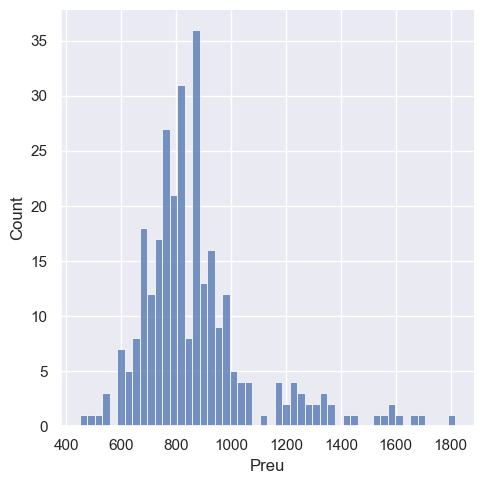

In [17]:
sns.displot(df_preuLloguerMM, x="Preu", bins=50);
plt.savefig("Graf_Preu_MM.png");

La distribución del precio medio mensual es unimodal y confirma el análisis estadístico de una distribución sesgada positiva. La mayoría de alquileres se agrupan alrededor de la media y unos pocos son mucho más altos de la media, los outliers que esperábamos.

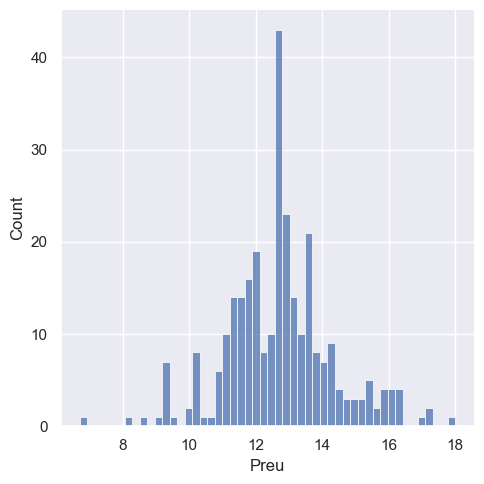

In [18]:
sns.displot(df_preuLloguerMS, x="Preu", bins=50)
plt.savefig("Graf_Preu_MS.png");

La dristribución del precio medio por superficie es unimodal y mucho más centrada en la media.

**Visualización para una variable numérica y una categórica (Districte i Preu)**

<Figure size 1500x800 with 0 Axes>

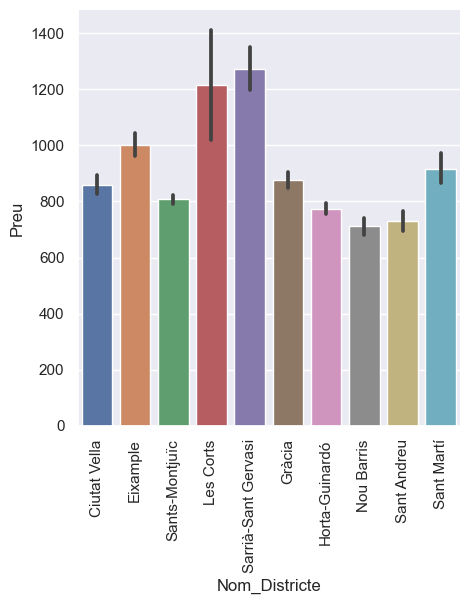

In [19]:
plt.figure(figsize = (15,8))
sns.catplot(data=df_preuLloguerMM, x='Nom_Districte', y='Preu', kind="bar")
plt.xticks(rotation=90)
plt.savefig("Graf_Districte_PreuMM.png");

<Figure size 1500x800 with 0 Axes>

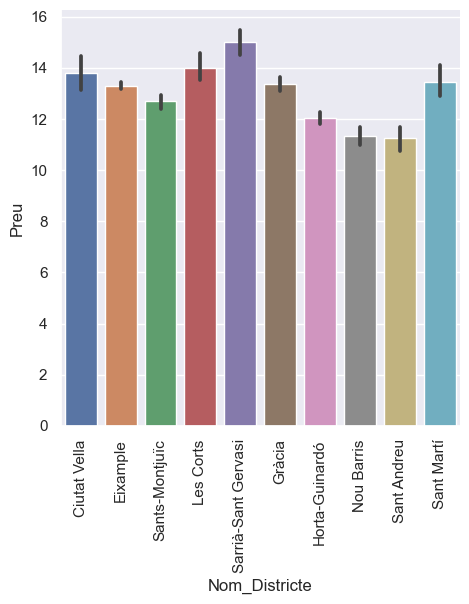

In [20]:
plt.figure(figsize = (15,8))
sns.catplot(data=df_preuLloguerMS, x='Nom_Districte', y='Preu', kind="bar")
plt.xticks(rotation=90)
plt.savefig("Graf_Districte_PreuMS.png");

Observamos en la gráfica anterior que el alquiler mensual del distrito de Gracia está en la media, sin embargo el precio del alquiler por metro cuadrado en más alto de la media, podemos deducir que las viviendas que se alquilan tienen una superfice menor que en otros distritos.

**Dos variables numéricas (Any o Trimestre i Preu)**

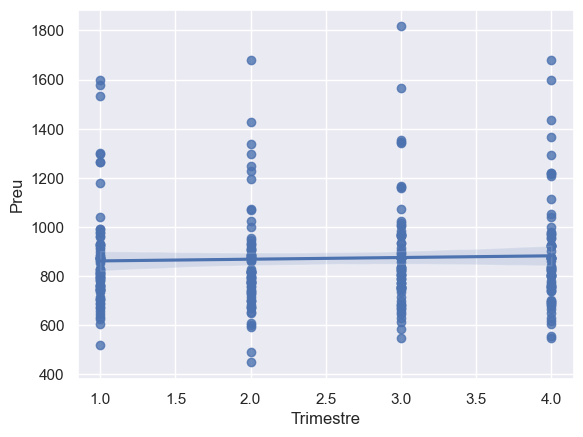

In [21]:
sns.regplot(x=df_preuLloguerMS["Trimestre"], y=df_preuLloguerMM["Preu"]) 
plt.savefig("Graf_Trimestre_Preu.png");

En esta gráfica podemos ver que la dinámica de los alquileres es similar en todos los trimestres. También podemos ver que la gran mayoría de valores extremos están por encima de la media.

**Tres variables (Barri o Districte, Trimestre i Preu)**

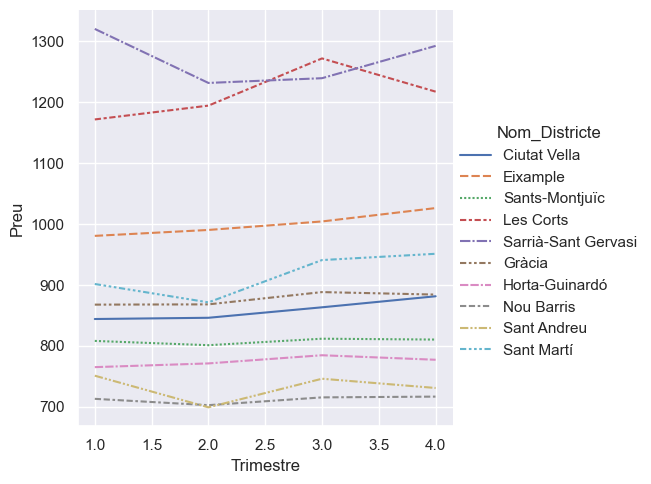

In [22]:
sns.relplot(
    data=df_preuLloguerMM, kind="line",
    x="Trimestre", y="Preu", hue="Nom_Districte", style="Nom_Districte", ci=None)
plt.savefig("Graf_Trimestre_Preu_Districte.png");

El resultado nos muestra cláramente qué barrios son más asequibles para alquilar. Refleja también que el alquiler a lo largo del año tiene pocas variaciones.

### Exercici 2
Exporta els gràfics com imatges o com HTML.

Las imágenes están recogidas en este repositorio:
https://github.com/Mardezcos/CDades-Sprint-4-Exercicis

### Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

Nos aperece interesante ver cómo se distruye el alquiler por barrios en los distritos. Trabajaremos tres distritos por sus particularidades: Gràcia, Sarrià y Nou Barris.

#### Distrito de Gràcia

In [23]:
df_preuLloguerMMGracia = df_preuLloguerMM.loc[df_preuLloguerMM.Nom_Districte == 'Gràcia']
df_preuLloguerMMGracia['Nom_Barri'].unique()

array(['Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova"],
      dtype=object)

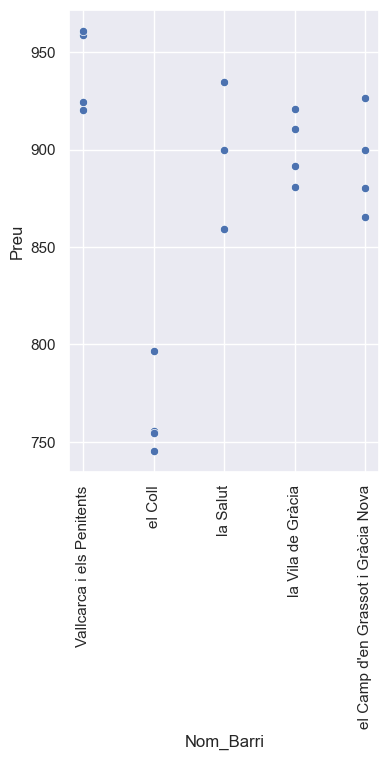

In [24]:
plt.figure(figsize = (4,6))
sns.scatterplot(data=df_preuLloguerMMGracia, x="Nom_Barri", y="Preu", legend=False)
plt.xticks(rotation=90)
plt.savefig("DistricteGracia_Barris.png");

#### Distrito de Sarrià-Sant Gervasi

In [25]:
df_preuLloguerMMSarria = df_preuLloguerMM.loc[df_preuLloguerMM.Nom_Districte == 'Sarrià-Sant Gervasi']
df_preuLloguerMMSarria['Nom_Barri'].unique()

array(['Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró'], dtype=object)

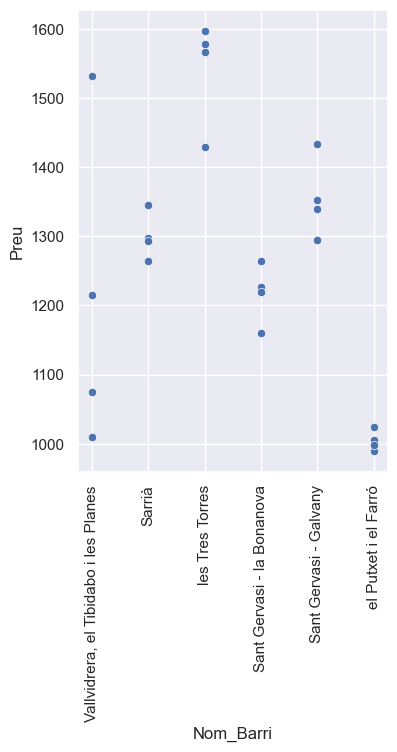

In [26]:
plt.figure(figsize = (4,6))
sns.scatterplot(data=df_preuLloguerMMSarria, x="Nom_Barri", y="Preu", legend=False)
plt.xticks(rotation=90)
plt.savefig("DistricteSarria_Barris.png");

#### Nou Barris

In [27]:
df_preuLloguerMMNouBarris = df_preuLloguerMM.loc[df_preuLloguerMM.Nom_Districte == 'Nou Barris']
df_preuLloguerMMNouBarris['Nom_Barri'].unique()

array(['Vilapicina i la Torre Llobeta', 'Porta', 'el Turó de la Peira',
       'Can Peguera', 'la Guineueta', 'Canyelles', 'les Roquetes',
       'Verdun', 'la Prosperitat', 'la Trinitat Nova', 'Torre Baró',
       'Ciutat Meridiana', 'Vallbona'], dtype=object)

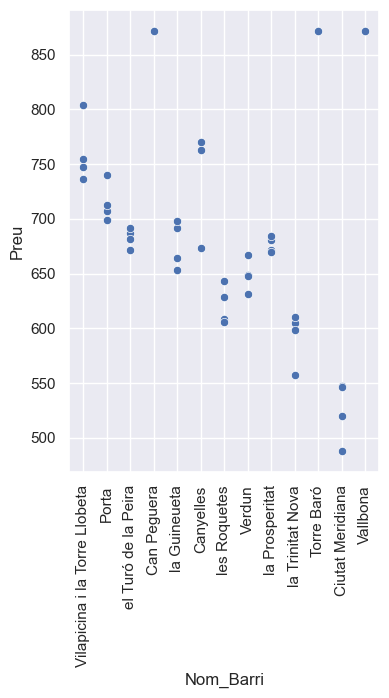

In [28]:
plt.figure(figsize = (4,6))
sns.scatterplot(data=df_preuLloguerMMNouBarris, x="Nom_Barri", y="Preu", legend=False)
plt.xticks(rotation=90)
plt.savefig("DistricteNouBarris_Barris.png");

Queda en estas gráficas reflejada la diferencia del precio del alquiler mensual por barrios dentro de un mismo distrito. Vemos una marcada diferencia en el barrio de El Coll en Gràcia, El Putxet el Sarrià y Ciutat Meridiana en Nou Barris.